In [73]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib
import sqlite3
import requests
import json
import ast

In [74]:
trades = []
data = requests.get("http://20.106.210.106:3000/lastUpdated").json()
trades = data["trades"]
current = data["current"]


trades = ast.literal_eval(trades)
trades = trades[6:]


Text(0, 0.5, 'Amount ($)')

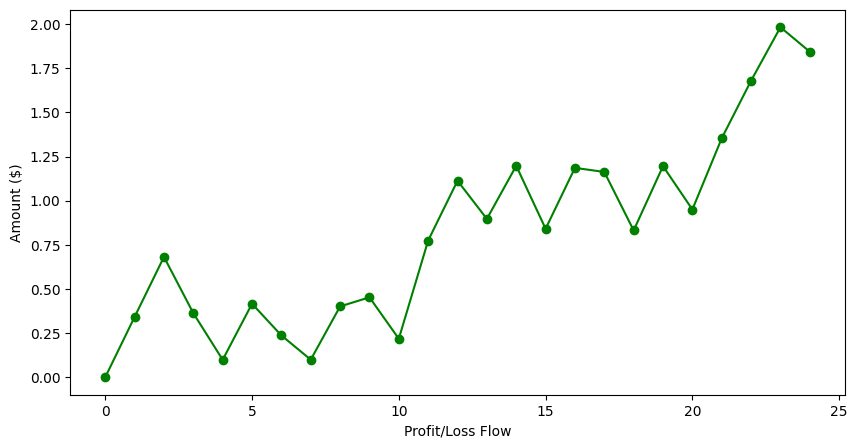

In [75]:
flow = [0]
pnl = [0] 
for i in trades:
    flow.append(i[5]+flow[-1] - 0.05)
    pnl.append(i[5] - 0.05)

plt.figure(figsize=(10, 5))
plt.plot(flow, marker='o', color='g')
plt.xlabel("Profit/Loss Flow")
plt.ylabel("Amount ($)")

<BarContainer object of 25 artists>

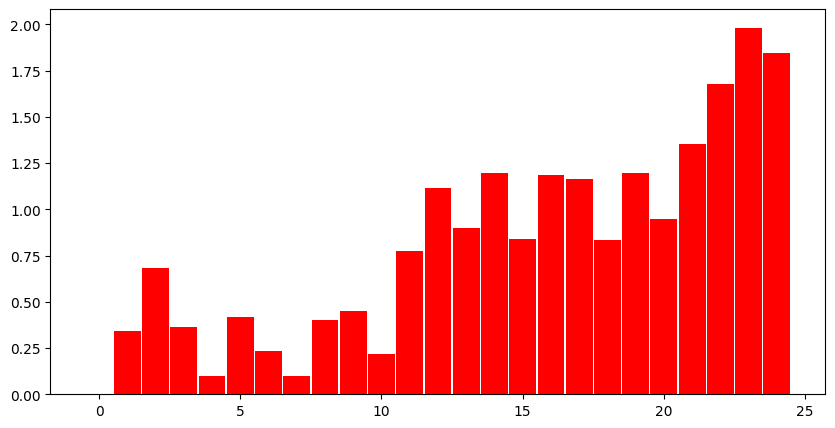

In [76]:
plt.figure(figsize=(10,5))
plt.bar([i for i in range(len(flow))],flow, color='red', width=0.95)

# Capital Growth

<BarContainer object of 25 artists>

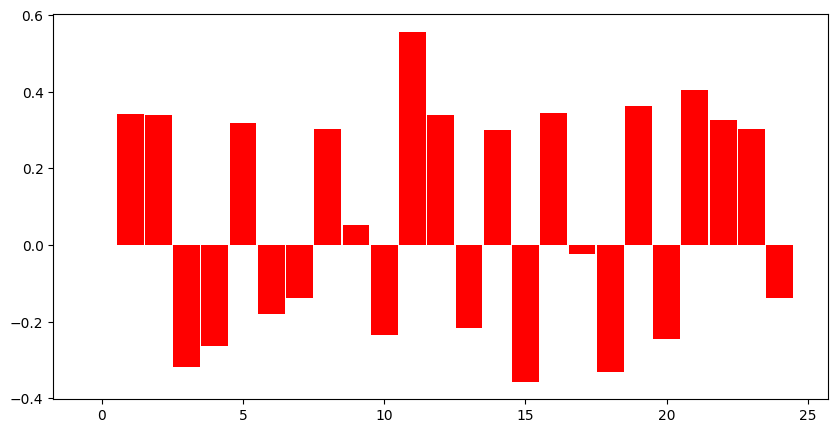

In [77]:
plt.figure(figsize=(10,5))
plt.bar([i for i in range(len(pnl))],pnl, color='red', width=0.95)

# PNL of completed trades

In [78]:
print(current)

{'entry': 60962.0, 'side': 'LONG', 'sizeFiat': 100, 'sizeAsset': 0.0016403661297201535, 'pnl': 0.07742528132278648, 'pnl_percent': 0.07742528132278648, 'macd': np.float64(4.3), 'ema': np.float64(62152.0), 'entry_time': '2024-07-03 05:45:51', 'timeframe': '15m', 'pair': 'BTC-USD', 'tradeid': 'TRD-LONG-8013'}
